In [21]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

In [22]:
(X_train,Y_train),(X_valid,Y_valid) = mnist.load_data()

In [23]:
X_train =X_train .reshape(60000,784).astype('float32')
X_valid =X_valid .reshape(10000,784).astype('float32')

In [24]:
X_train /=255
X_valid /=255

In [25]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
from keras import utils as np_utils
n_classes=10
Y_train=keras.utils.np_utils.to_categorical(Y_train,n_classes)
Y_valid=keras.utils.np_utils.to_categorical(Y_valid,n_classes)

In [27]:
Y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [28]:
model=Sequential()

In [29]:
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [30]:
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [33]:
history=model.fit(X_train,Y_train,batch_size=128,epochs=150,verbose=1)

2022-11-07 14:17:47.023694: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/150
469/469 [==============================] - 4s 3ms/step - loss: 0.0923 - accuracy: 0.1011
Epoch 2/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.1081
Epoch 3/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.1172
Epoch 4/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0907 - accuracy: 0.1294
Epoch 5/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0904 - accuracy: 0.1443
Epoch 6/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.1603
Epoch 7/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0898 - accuracy: 0.1773
Epoch 8/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.1982
Epoch 9/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.2229
Epoch 10/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0889 - accura

In [19]:

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, Y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_valid, Y_train,Y_valid = train_test_split(X, Y, stratify=Y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

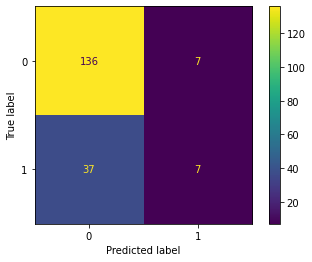

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = clf.predict(X_valid)
cm = confusion_matrix(Y_valid, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()